In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Hyperparemeters

vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2021-03-27 19:29:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2021-03-27 19:29:33 (184 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json
with open('/tmp/sarcasm.json', 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [ ]:
training_sentences = sentences[:training_size]
training_labels = labels[:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded= pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding=padding_type, truncating=trunc_type, maxlen=max_length)

In [ ]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(24, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded,testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.5746 - accuracy: 0.6931 - val_loss: 0.4031 - val_accuracy: 0.8350
Epoch 2/30
625/625 - 2s - loss: 0.3182 - accuracy: 0.8712 - val_loss: 0.3441 - val_accuracy: 0.8539
Epoch 3/30
625/625 - 2s - loss: 0.2400 - accuracy: 0.9057 - val_loss: 0.3407 - val_accuracy: 0.8557
Epoch 4/30
625/625 - 2s - loss: 0.1944 - accuracy: 0.9255 - val_loss: 0.3540 - val_accuracy: 0.8544
Epoch 5/30
625/625 - 2s - loss: 0.1615 - accuracy: 0.9393 - val_loss: 0.3783 - val_accuracy: 0.8524
Epoch 6/30
625/625 - 2s - loss: 0.1364 - accuracy: 0.9513 - val_loss: 0.4099 - val_accuracy: 0.8477
Epoch 7/30
625/625 - 2s - loss: 0.1177 - accuracy: 0.9589 - val_loss: 0.4474 - val_accuracy: 0.8410
Epoch 8/30
625/625 - 2s - loss: 0.1022 - accuracy: 0.9658 - val_loss: 0.4804 - val_accuracy: 0.8401
Epoch 9/30
625/625 - 2s - loss: 0.0880 - accuracy: 0.9723 - val_loss: 0.5188 - val_accuracy: 0.8387
Epoch 10/30
625/625 - 2s - loss: 0.0767 - accuracy: 0.9749 - val_loss: 0.5661 - val_accuracy: 0.8331

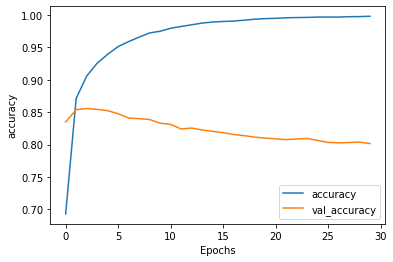

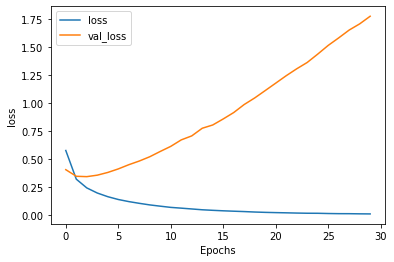

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')